In [18]:
import os
import h5py
import pandas as pd
import utilities

In [15]:
def load_h5py(filename):
    f = h5py.File(filename)
    data = {}
    for total_turns in f.keys():
        params = dict([(str(k), v[()]) for (k, v) in zip(f[total_turns].keys(), f[total_turns].values())])
        data[int(total_turns)] = params
    return data


def add_to_dataframe(filename, df):
    prefix = os.path.splitext(os.path.split(filename)[1])[0]
    for total_turns, params in load_h5py(filename).items():
            for param, value in params.items():
                column_name = '{}_{}'.format(prefix, param)
                df.loc[df.mmw_atten_total_turns==total_turns, column_name] = value
    return df


def white_noise_model(f, series):
    W2 = series.noise_fit_device_noise
    A2 = series.noise_fit_amplifier_noise
    f_c = series.noise_fit_fc
    return W2 / (1 + (f / f_c)**2) + A2


def pink_noise_model(f, series, key):
    W2 = series['{}_white'.format(key)]
    A2 = series['{}_amp'.format(key)]
    f_c = series['{}_invtau'.format(key)]
    f_k = series['{}_fknee'.format(key)]
    alpha = series['{}_alpha'.format(key)]
    return W2 * (1 + (f / f_k)**(-alpha)) / (1 + (f / f_c)**2) + A2

In [16]:
bb = pd.DataFrame(np.load('broadband.npy'))
cw = pd.DataFrame(np.load('continuous-wave.npy'))

In [19]:
bb = add_to_dataframe('2015-12-17_bbfit4/bb_unbin_cut10ampfr_err.h5', bb)
cw = add_to_dataframe('2015-12-17_cwfit4/cw_unbin_cut10ampfr_err.h5', cw)


In [20]:
n_bins = 200

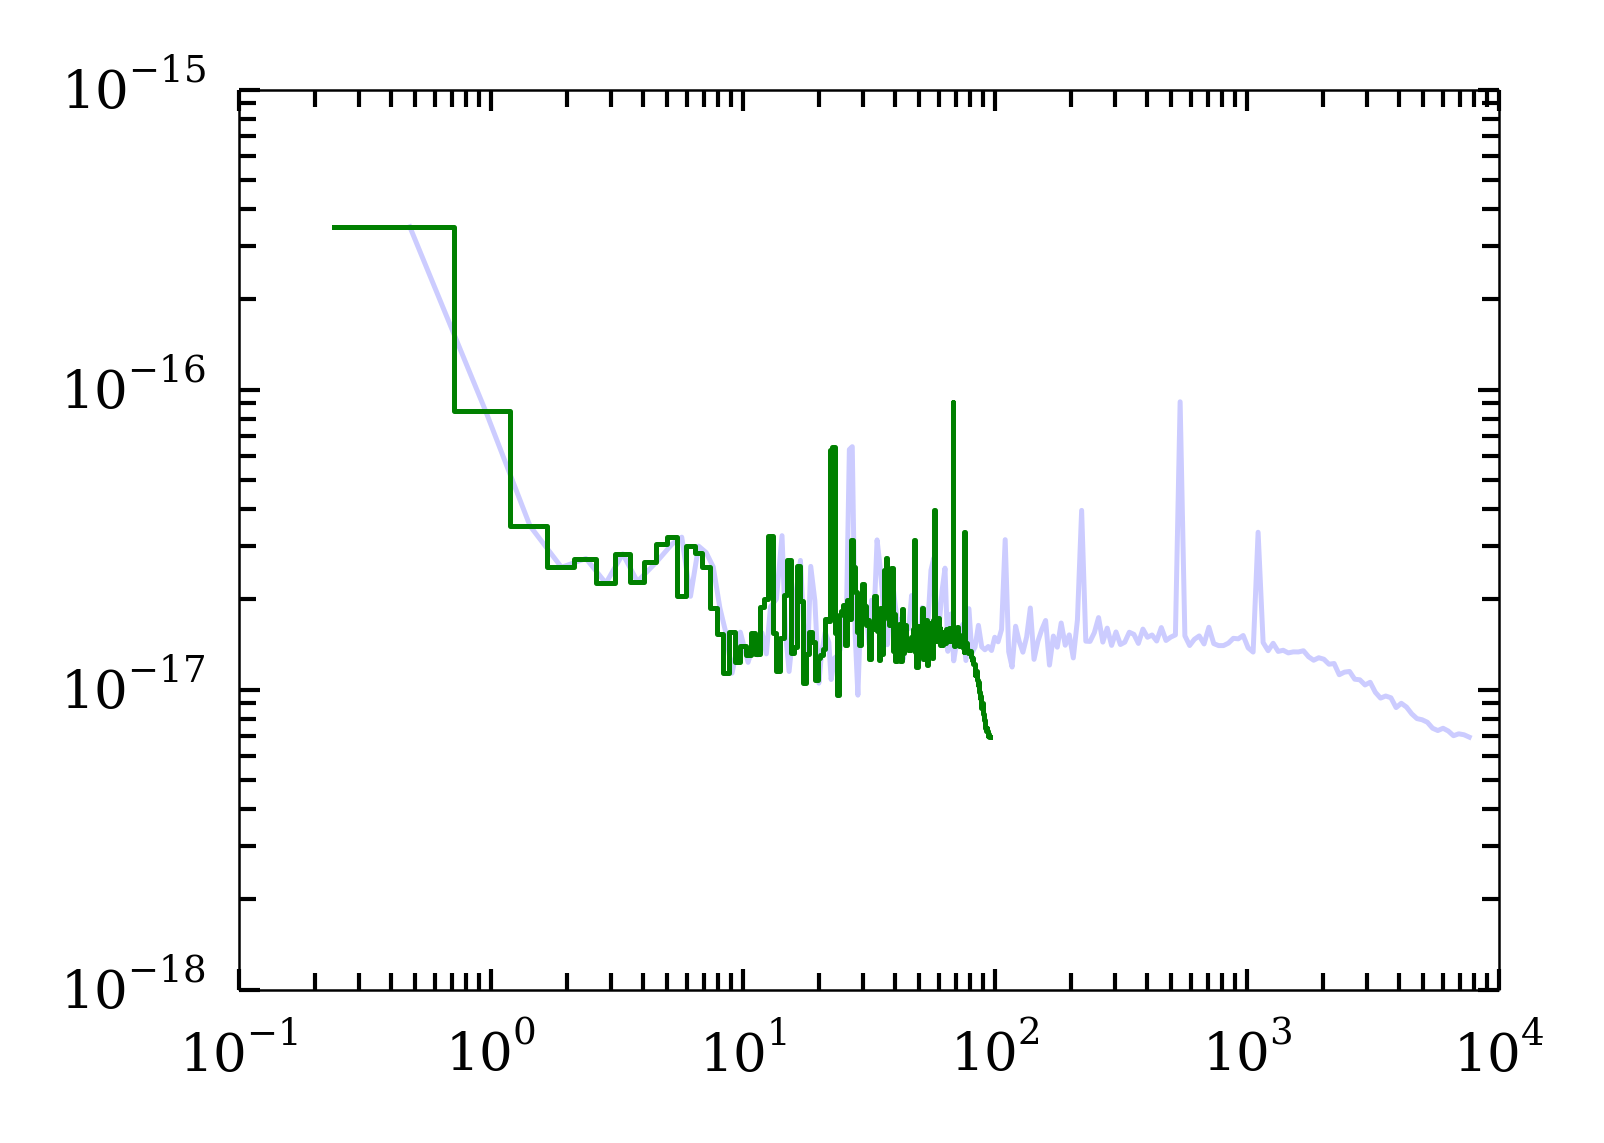

In [23]:
fig, ax = plt.subplots()

ax.plot(bbz['f'], bbz['06_dev'], alpha=0.2)
bins, binned, counts = utilities.log_bin(bbz['f'][1] - bbz['f'][0], bbz['06_dev'], n_bins)
utilities.histogram(ax, bins, binned);
ax.set_xscale('log')
ax.set_yscale('log');